In [2]:
#importing packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [3]:
#importing edges
imports_edges = pd.read_csv('edges_csv.csv', sep = ';')
print(imports_edges)
imports_df=pd.DataFrame(imports_edges, columns=['importer', 'exporter', 'amount'])
print(imports_df)

     importer  exporter  amount
0          78        25     556
1          24        25   23023
2          26        25   12714
3          38        25    1243
4          78        28    2141
..        ...       ...     ...
995        31        19    1195
996         7        19    2158
997        26        19    3495
998        38        19    3277
999        71        19    1308

[1000 rows x 3 columns]
     importer  exporter  amount
0          78        25     556
1          24        25   23023
2          26        25   12714
3          38        25    1243
4          78        28    2141
..        ...       ...     ...
995        31        19    1195
996         7        19    2158
997        26        19    3495
998        38        19    3277
999        71        19    1308

[1000 rows x 3 columns]


In [4]:
#appending weighted edges
weighted_edges = []
for i in imports_df.index: 
     weighted_edges.append((imports_df['importer'][i], imports_df['exporter'][i], imports_df['amount'][i])) 
print(weighted_edges)

[(78, 25, 556), (24, 25, 23023), (26, 25, 12714), (38, 25, 1243), (78, 28, 2141), (7, 28, 1586), (24, 28, 47886), (26, 28, 1242), (38, 28, 6045), (78, 53, 55418), (39, 53, 14864), (13, 53, 13802), (7, 53, 21765), (18, 53, 81733), (24, 53, 70505), (26, 53, 135528), (38, 53, 50337), (50, 53, 42223), (77, 53, 410961), (4, 53, 15952), (23, 53, 57521), (71, 53, 206891), (50, 53, 18272), (78, 24, 5786), (7, 24, 101487), (18, 24, 16572), (26, 24, 222186), (38, 24, 74172), (50, 24, 35342), (69, 24, 16791), (77, 24, 17678), (4, 24, 14600), (71, 24, 6898), (50, 24, 12512), (11, 12, 5490), (78, 12, 73311), (2, 12, 14351), (10, 12, 61905), (14, 12, 4574), (80, 12, 7886), (39, 12, 6195), (13, 12, 12624), (41, 12, 4326), (24, 12, 3861), (26, 12, 17066), (38, 12, 15325), (69, 12, 21783), (77, 12, 11294), (71, 12, 6484), (72, 12, 3572), (3, 12, 17197), (78, 31, 152931), (39, 31, 306474), (13, 31, 1210975), (41, 31, 65315), (66, 31, 55176), (26, 31, 76823), (38, 31, 41006), (77, 31, 190501), (78, 23, 2

In [5]:
#Creating a graph
G = nx.DiGraph()
G.add_weighted_edges_from(weighted_edges)
nx.info(G)
nx.is_weighted(G)

True

In [53]:
#importing the attributes
attributes=pd.read_csv('attributes_names.csv', sep = ';', header = 'infer')
# start the indexing of the dataset from 1 - just as the nodes in the network
attributes_df=pd.DataFrame(attributes, columns=['index', 'country', 'world_system_position', 'GDP_capita', 'continent'])
attributes_df.set_index('index', inplace = True, drop = True)
attributes_df['index_number'] = attributes_df.index
print(attributes_df)
attributes_series = pd.Series(attributes_df['world_system_position'])
print(len(attributes_series))
attributes_dict = attributes_series.to_dict()
print(len(attributes_dict))
print(attributes_dict)


                  country world_system_position  GDP_capita  continent  \
index                                                                    
1               "Algeria"        semi-periphery      1209.0          1   
2             "Argentina"        semi-periphery      8042.0          6   
3             "Australia"        semi-periphery     20333.0          5   
4               "Austria"                  core     28942.0          3   
5              "Barbados"        semi-periphery      7053.0          6   
6            "Bangladesh"             periphery       272.0          2   
7         "Belgium /Lux."                  core     27129.0          3   
8                "Belize"             periphery      2753.0          4   
9               "Bolivia"             periphery       885.0          6   
10               "Brazil"        semi-periphery      4501.0          6   
11               "Canada"        semi-periphery     19362.0          4   
12                "Chile"        semi-

In [8]:
#relabeling nodes
mapping = dict(zip(sorted(G), attributes_df['country']))
G = nx.relabel_nodes(G, mapping, copy = True)
print(G.nodes())


['"United States"', '"French Guiana"', '"France Mon."', '"Germany"', '"Italy"', '"Guadeloupe"', '"Belgium /Lux."', '"Norway"', '"Japan"', '"China"', '"Denmark"', '"Netherlands"', '"United Kingdom"', '"Austria"', '"Finland"', '"Sweden"', '"Spain"', '"Canada"', '"Chile"', '"Argentina"', '"Brazil"', '"Colombia"', '"Venezuela"', '"Korea. Rep. Of"', '"Switzerland"', '"Australia"', '"Hong Kong"', '"Singapore"', '"Martinique"', '"Southern Africa"', '"Reunion"', '"India"', '"Ireland"', '"Portugal"', '"Sri Lanka"', '"Indonesia"', '"Malaysia"', '"Thailand"', '"Hungary"', '"Slovenia"', '"Czech Rep."', '"Poland"', '"Mexico"', '"Iceland"', '"Pakistan"', '"Fiji"', '"New Zealand"', '"Cyprus"', '"Greece"', '"Moldava. Rep. Of"', '"Romania"', '"Philippines"', '"Latvia"', '"Egypt"', '"Tunisia"', '"Turkey"', '"Belize"', '"Guatemala"', '"Barbados"', '"Trinidad Tobago"', '"Madagascar"', '"Peru"', '"Mauritius"', '"Nicaragua"', '"El Salvador"', '"Honduras"', '"Panama"', '"Oman"', '"Uruguay"', '"Ecuador"', '"I

In [9]:
#node color modification
node_color = []

for node in G.nodes(data=True):
    for k,v in node[1].items():
        if v == 'core':
            node_color.append('green')
        elif v == 'semi-periphery':
            node_color.append('yellow')
        else:
            node_color.append('red')

print(len(node_color))


80


In [7]:
#Setting the attributes
nx.set_node_attributes(G, attributes_dict, 'world_system_position')
for node in G.nodes(data=True):
    print(node)
print(sorted(G.nodes()))

(78, {'world_system_position': 'core'})
(25, {'world_system_position': 'periphery'})
(24, {'world_system_position': 'core'})
(26, {'world_system_position': 'core'})
(38, {'world_system_position': 'core'})
(28, {'world_system_position': 'periphery'})
(7, {'world_system_position': 'core'})
(53, {'world_system_position': 'semi-periphery'})
(39, {'world_system_position': 'core'})
(13, {'world_system_position': 'core'})
(18, {'world_system_position': 'semi-periphery'})
(50, {'world_system_position': 'core'})
(77, {'world_system_position': 'core'})
(4, {'world_system_position': 'core'})
(23, {'world_system_position': 'semi-periphery'})
(71, {'world_system_position': 'core'})
(69, {'world_system_position': 'semi-periphery'})
(11, {'world_system_position': 'semi-periphery'})
(12, {'world_system_position': 'semi-periphery'})
(2, {'world_system_position': 'semi-periphery'})
(10, {'world_system_position': 'semi-periphery'})
(14, {'world_system_position': 'semi-periphery'})
(80, {'world_system_pos

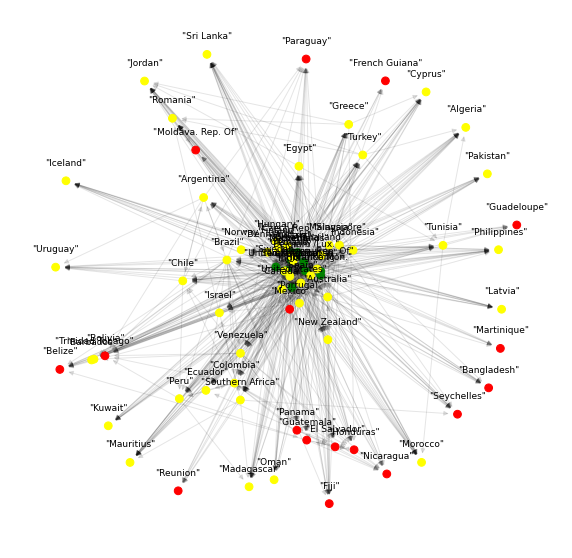

In [11]:
#Visualizing a network
fig=plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=60, node_color = node_color)
nx.draw_networkx_edges(G, pos = pos, arrows = True, alpha = 0.1)#edge_color = 'b'
pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.075)
nx.draw_networkx_labels(G, pos_attrs, font_size=9)

plt.axis('off')
plt.show()



In [36]:
#Calculating in degrees
in_degrees = []
for deg in G:
    in_degrees.append(G.in_degree(deg, weight = 'weight'))
print(in_degrees)

in_degree_pairs = G.in_degree(weight = 'weight')
print(in_degree_pairs)

in_degree_dict = dict()
for country,score in in_degree_pairs: 
    in_degree_dict.setdefault(country, []).append(score) 
print(in_degree_dict) 

in_degree_df = pd.DataFrame.from_dict(in_degree_dict, orient='index', columns= ['in_degrees'])
print(in_degree_df)

in_degree_sorted_ascending = in_degree_df.sort_values('in_degrees')
in_degree_sorted_ascending.to_excel('in_degree_sorted_ascending.xlsx')
in_degree_sorted_descending= in_degree_df.sort_values('in_degrees', ascending = False)
in_degree_sorted_descending.to_excel('in_degree_sorted_descending.xlsx')

[9275767, 37536, 488682, 7874288, 2029655, 58900, 2594610, 1153549, 2107633, 1039561, 925093, 2826207, 3601075, 1815279, 486999, 1408937, 1817999, 3696902, 287244, 516582, 399041, 183938, 172252, 1217689, 1849225, 1009620, 2099201, 1488332, 60328, 461135, 81764, 190560, 463436, 474909, 77519, 589642, 1050667, 1267861, 390779, 212157, 312408, 471718, 3202712, 54379, 81898, 25122, 228789, 77601, 375846, 1227, 98497, 376726, 15156, 171611, 126032, 348368, 11737, 67195, 18664, 41284, 21579, 132807, 36280, 20731, 54203, 34675, 52000, 32826, 57328, 77188, 463744, 119459, 45271, 57455, 262950, 105798, 128516, 59542, 15084, 17070]
[('"United States"', 9275767), ('"French Guiana"', 37536), ('"France Mon."', 488682), ('"Germany"', 7874288), ('"Italy"', 2029655), ('"Guadeloupe"', 58900), ('"Belgium /Lux."', 2594610), ('"Norway"', 1153549), ('"Japan"', 2107633), ('"China"', 1039561), ('"Denmark"', 925093), ('"Netherlands"', 2826207), ('"United Kingdom"', 3601075), ('"Austria"', 1815279), ('"Finlan

In [37]:
#Calculating out degrees
out_degrees = []
for deg in G:
    out_degrees.append(G.out_degree(deg, weight = 'weight'))
#print(in_degrees)

out_degree_pairs = G.out_degree(weight = 'weight')
#print(out_degree_pairs)

out_degree_dict = dict()
for country,score in out_degree_pairs: 
    out_degree_dict.setdefault(country, []).append(score) 
#print(out_degree_dict) 

out_degree_df = pd.DataFrame.from_dict(out_degree_dict, orient='index', columns= ['out_degrees'])
#print(out_degree_df)
out_degree_sorted_ascending = out_degree_df.sort_values('out_degrees')
out_degree_sorted_ascending.to_excel('out_degree_sorted_ascending.xlsx')
out_degree_sorted_descending= out_degree_df.sort_values('out_degrees', ascending = False)
out_degree_sorted_descending.to_excel('out_degree_sorted_descending.xlsx')

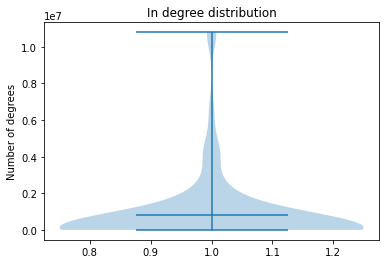

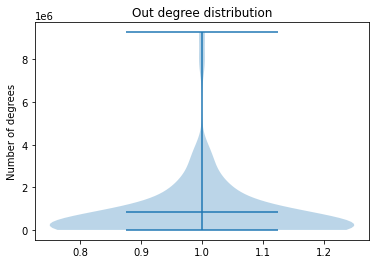

In [38]:
#Plotting in and out degrees
plt.violinplot(out_degrees, showmeans=True, showextrema=True)
plt.title('In degree distribution')
plt.ylabel('Number of degrees')
plt.show()   
plt.violinplot(in_degrees, showmeans=True, showextrema=True)
plt.title('Out degree distribution')
plt.ylabel('Number of degrees')
plt.show()  

             countries  degree_coefficients
0      "United States"             1.163815
1      "French Guiana"             0.000000
2        "France Mon."             8.468028
3            "Germany"             1.358743
4              "Italy"             2.345089
5         "Guadeloupe"             0.000000
6      "Belgium /Lux."             0.628210
7             "Norway"             0.113953
8              "Japan"             3.065067
9              "China"             3.971681
10           "Denmark"             0.786690
11       "Netherlands"             0.741885
12    "United Kingdom"             0.981953
13           "Austria"             1.029226
14           "Finland"             0.399056
15            "Sweden"             1.121570
16             "Spain"             0.430669
17            "Canada"             0.574814
18             "Chile"             0.128347
19         "Argentina"             0.099061
20            "Brazil"             1.403372
21          "Colombia"          

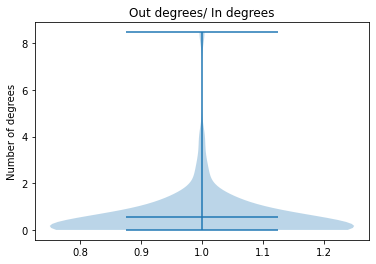

In [47]:
#Creating and ploting out degree/in degree ratios
from operator import truediv 
degree_coefficients = list(map(truediv, out_degrees, in_degrees))
d = {"countries":out_degree_df.index, "degree_coefficients":degree_coefficients}
degree_coefficients_df = pd.DataFrame(d)
print(degree_coefficients_df)
degree_coefficients_sorted_ascending = degree_coefficients_df.sort_values('degree_coefficients')
degree_coefficients_sorted_ascending.to_excel('degree_coefficients_sorted_ascending.xlsx')
degree_coefficients_sorted_descending = degree_coefficients_df.sort_values('degree_coefficients', ascending = False)
degree_coefficients_sorted_descending.to_excel('degree_coefficients_sorted_descending.xlsx')
plt.violinplot(degree_coefficients, showmeans=True, showextrema=True)
plt.title('Out degrees/ In degrees')
plt.ylabel('Number of degrees')
plt.show()  


In [25]:
#creating a data frame for clustering:
pd.set_option("display.max_rows", None, "display.max_columns", None)
degrees_df = pd.merge(in_degree_df, out_degree_df, left_index=True, right_index=True)
print(degrees_df)
degrees_df_div = degrees_df.div(100)
print(degrees_df_div)
degrees_df1 = degrees_df + 1
print(degrees_df1)
degrees_df_log = (degrees_df1.apply(np.log10))
print(degrees_df_log)


                    in_degrees  out_degrees
"United States"        9275767     10795275
"French Guiana"          37536            0
"France Mon."           488682      4138173
"Germany"              7874288     10699134
"Italy"                2029655      4759721
"Guadeloupe"             58900            0
"Belgium /Lux."        2594610      1629959
"Norway"               1153549       131450
"Japan"                2107633      6460036
"China"                1039561      4128805
"Denmark"               925093       727761
"Netherlands"          2826207      2096721
"United Kingdom"       3601075      3536086
"Austria"              1815279      1868332
"Finland"               486999       194340
"Sweden"               1408937      1580222
"Spain"                1817999       782955
"Canada"               3696902      2125031
"Chile"                 287244        36867
"Argentina"             516582        51173
"Brazil"                399041       560003
"Colombia"              183938  

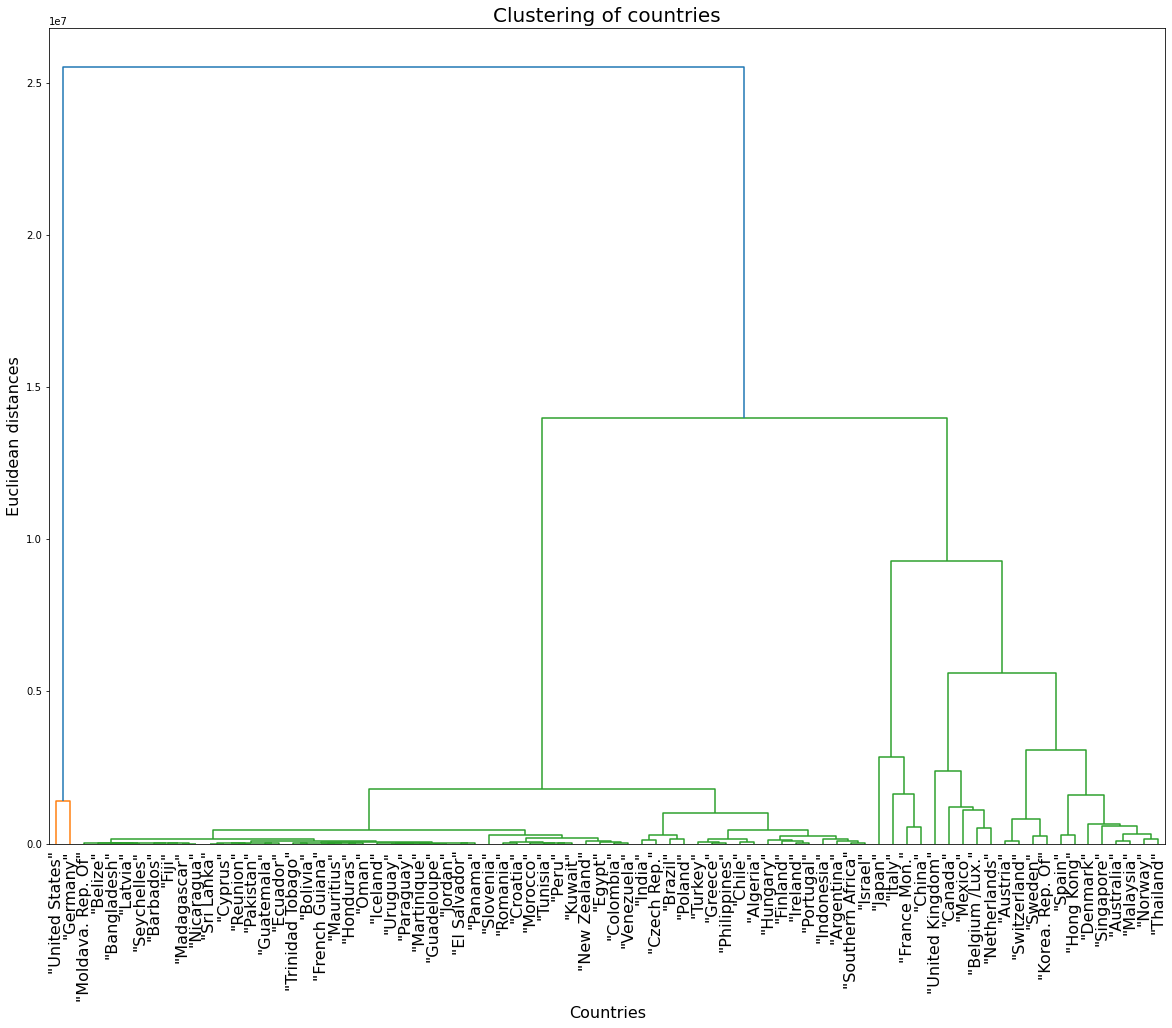

In [29]:
#Clustering based on raw data
import scipy.cluster.hierarchy as sch
from matplotlib.pyplot import figure
labels = list(degrees_df_log.index)

plt.figure(figsize=(20,15))
sch.dendrogram(sch.linkage(degrees_df, method = "ward"), labels=labels)
plt.title('Clustering of countries', fontsize = 20)
plt.xlabel('Countries', fontsize=16)
plt.ylabel('Euclidean distances', fontsize=16)
plt.xticks(fontsize= 16, rotation = 90)
plt.show()

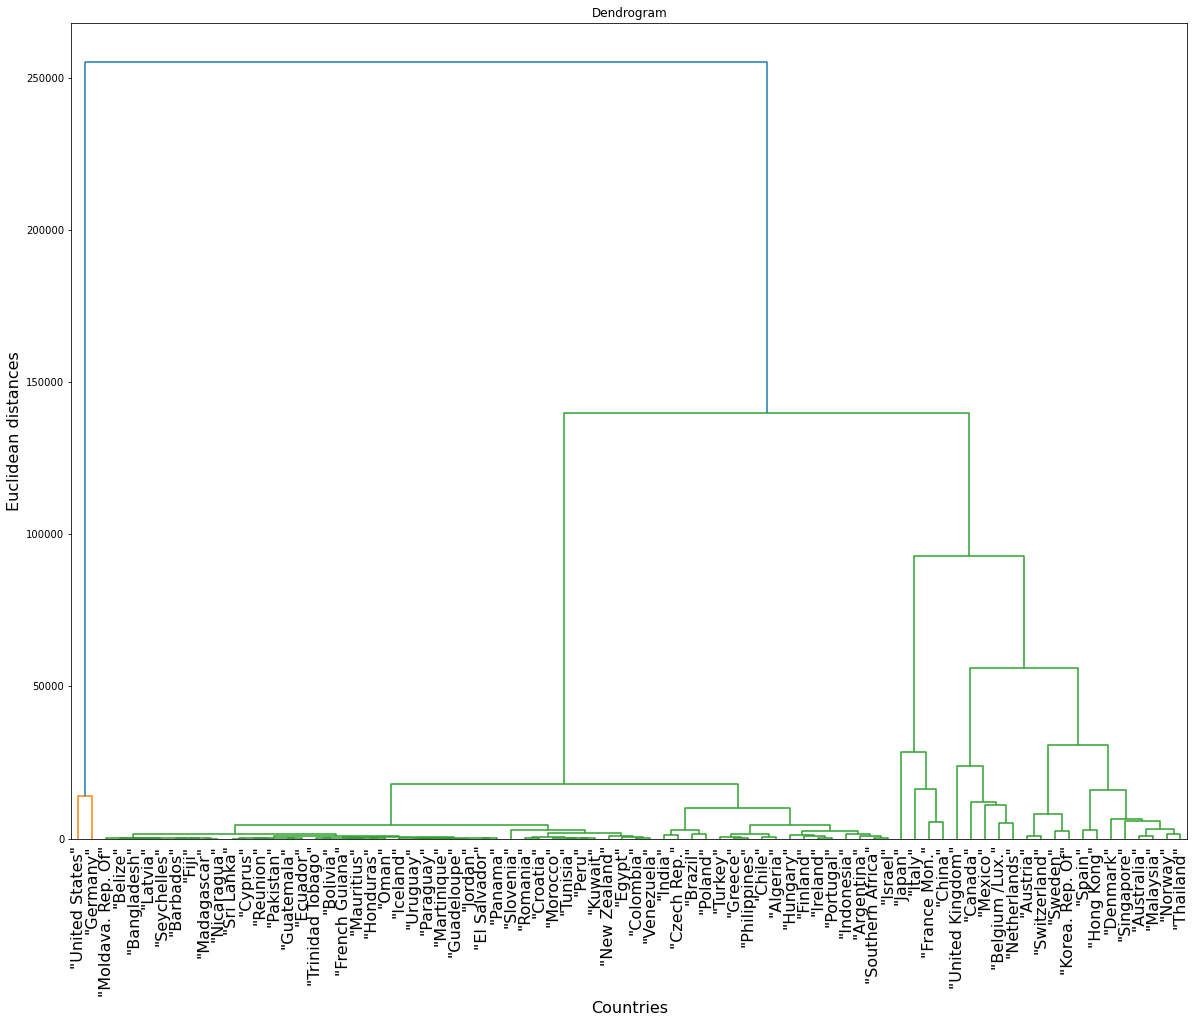

In [204]:
#Clustering based on log data
import scipy.cluster.hierarchy as sch
from matplotlib.pyplot import figure
labels = list(degrees_df_div.index)

plt.figure(figsize=(20,15))
sch.dendrogram(sch.linkage(degrees_df_div, method = "ward"), labels=labels)
plt.title('Dendrogram')
plt.xlabel('Countries', fontsize=16)
plt.ylabel('Euclidean distances', fontsize=16)
plt.xticks(fontsize= 16, rotation = 90)
plt.show()

In [57]:
#comparisson of expected and empirical clusters
clusters=pd.read_csv('cluster_comparisson.csv', sep = ';', header = 'infer')
# start the indexing of the dataset from 1 - just as the nodes in the network
clusters_df=pd.DataFrame(clusters, columns=['country', 'expected cluster', 'empirical cluster'])
clusters_df.set_index('country', inplace = True, drop = True)
clusters_df



,expected cluster,empirical cluster
country,,
"""Algeria""",semi-periphery,periphery
"""Argentina""",semi-periphery,upper semi-periphery
"""Australia""",semi-periphery,upper semi-periphery
"""Austria""",core,core
"""Barbados""",semi-periphery,lower semi-periphery
"""Bangladesh""",periphery,periphery
"""Belgium /Lux.""",core,core
"""Belize""",periphery,periphery
"""Bolivia""",periphery,lower semi-periphery


In [78]:
#Crosstabulation
import numpy as np 

clusters_crosstab = pd.crosstab(clusters_df['expected cluster'], 
                            clusters_df['empirical cluster'],  
                               margins = False) 
print(clusters_crosstab)


clusters_crosstab.to_excel('clusters_crosstab.xlsx')

empirical cluster  core  lower semi-periphery  periphery  upper semi-periphery
expected cluster                                                              
core                 12                     0          0                     0
periphery             1                     6         10                     0
semi-periphery        6                     8         14                    23


In [92]:
#Chi square calculation
crosstab, chisquare, expected = researchpy.crosstab(clusters_df['expected cluster'], clusters_df['empirical cluster'], expected_freqs = True, test= 'chi-square')
print(crosstab)
print(chisquare)
print(expected)

chisquare.to_excel('chi_square.xlsx')

                  empirical cluster                                 \
empirical cluster              core lower semi-periphery periphery   
expected cluster                                                     
core                             12                    0         0   
periphery                         1                    6        10   
semi-periphery                    6                    8        14   
All                              19                   14        24   

                                            
empirical cluster upper semi-periphery All  
expected cluster                            
core                                 0  12  
periphery                            0  17  
semi-periphery                      23  51  
All                                 23  80  
                Chi-square test  results
0  Pearson Chi-square ( 6.0) =   61.5146
1                    p-value =    0.0000
2                 Cramer's V =    0.6201
                  empirical cl